Práctica Final NLP José Carlos Amo Pérez
## 1. Descarga y exploración del corpus

Citation:

<small>Ups and downs: Modeling the visual evolution of fashion trends with one-class collaborative filtering
R. He, J. McAuley
WWW, 2016
https://cseweb.ucsd.edu/~jmcauley/pdfs/sigir15.pdf</small>

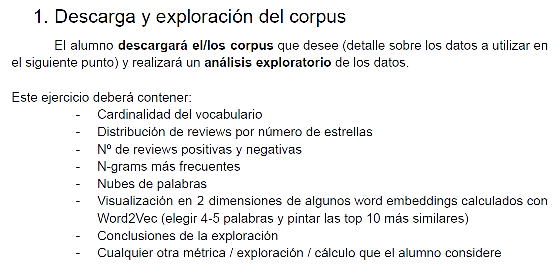

In [1]:
# Carga e importación de librerias:
!python -m spacy download es_core_news_sm
!pip install stop_words

import pandas as pd
import gzip
import spacy
import es_core_news_sm
import en_core_web_sm
from collections import Counter
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from stop_words import get_stop_words
import io
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

2023-03-09 11:28:19.440453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 11:28:22.014324: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-09 11:28:22.014478: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-09 11:28:22.014504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [3]:
#Descargo el conjunto de datos
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Musical_Instruments_5.json.gz')

In [4]:
# Miro el shape del df
print(f"El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas, etiquetas o variables")

El dataframe tiene 10261 filas y 9 columnas, etiquetas o variables


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10261 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 801.6+ KB


Esto me dice que el dataframe tiene 10261 filas y 9 columnas. La variable "reviewerName" posee valores NaN. Todas las variables excepto dos son de tipo objeto. Las que no son objeto son tipo flotante (overall) y tipo entero (unixReviewTime)

Sobre qué contiene cada etiqueta:
- **reviewerID** - ID del evaluador, por ejemplo,  A2SUAM1J3GNN3B
- **asin** - ID del producto, por ejemplo, 0000013714
- **reviewerName** - nombre del evaluador
- **helpful** - calificación de utilidad de la revisión, por ejemplo, 2/3
- **reviewText** - texto de la revisión
- **overall** - calificación del producto
- **summary** - resumen de la revisión
- **unixReviewTime** - hora de la revisión (tiempo Unix)
- **reviewTime** - hora de la revisión (en formato sin procesar)



In [6]:
#Miro las tres primeras filas del df
df.head(3).T

,0,1,2
reviewerID,A2IBPI20UZIR0U,A14VAT5EAX3D9S,A195EZSQDW3E21
asin,1384719342,1384719342,1384719342
reviewerName,"cassandra tu ""Yeah, well, that's just like, u...",Jake,"Rick Bennette ""Rick Bennette"""
helpful,"[0, 0]","[13, 14]","[1, 1]"
reviewText,"Not much to write about here, but it does exac...",The product does exactly as it should and is q...,The primary job of this device is to block the...
overall,5.0,5.0,5.0
summary,good,Jake,It Does The Job Well
unixReviewTime,1393545600,1363392000,1377648000
reviewTime,"02 28, 2014","03 16, 2013","08 28, 2013"


In [9]:
#Miro las tres últimas filas del df
df.tail(3).T

,10258,10259,10260
reviewerID,AWCJ12KBO5VII,A2Z7S8B5U4PAKJ,A2WA8TDCTGUADI
asin,B00JBIVXGC,B00JBIVXGC,B00JBIVXGC
reviewerName,Michael L. Knapp,"Rick Langdon ""Scriptor""",TheTerrorBeyond
helpful,"[0, 0]","[0, 0]","[0, 0]"
reviewText,I have tried coated strings in the past ( incl...,"Well, MADE by Elixir and DEVELOPED with Taylor...","These strings are really quite good, but I wou..."
overall,4.0,4.0,4.0
summary,Good for coated.,Taylor Made,"These strings are really quite good, but I wou..."
unixReviewTime,1405987200,1404172800,1405468800
reviewTime,"07 22, 2014","07 1, 2014","07 16, 2014"


In [10]:
# Miro los primeros 20 comentarios
n=0
for comentario in df['reviewText']:
    if n < 20:
      print(comentario)
      n += 1


Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,
The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]
The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or hi

In [11]:
# Cambio los nombres de las columnas porque en inglés no termino de entender lo que representan:
df = df.rename(columns={'reviewerID' : 'IDRevisor', 'asin':'IDProducto', 'reviewerName':'Revisor', 'helpful':'Utilidad', 
                        'reviewText':'Comentario', 'overall':'Calificación', 'summary':'Resumen', 'unixReviewTime':'HoraUnix', 
                        'reviewTime':'Fecha'})
df.head(1).T


,0
IDRevisor,A2IBPI20UZIR0U
IDProducto,1384719342
Revisor,"cassandra tu ""Yeah, well, that's just like, u..."
Utilidad,"[0, 0]"
Comentario,"Not much to write about here, but it does exac..."
Calificación,5.0
Resumen,good
HoraUnix,1393545600
Fecha,"02 28, 2014"


In [12]:
# Miro lo que contiene un elemento (el que tiene índice 5, por ejemplo)
pd.set_option('display.max_colwidth', -1)
print(df.iloc[5])

IDRevisor       A2A039TZMZHH9Y                                                                                                                                                                                                                            
IDProducto      B00004Y2UT                                                                                                                                                                                                                                
Revisor         Bill Lewey "blewey"                                                                                                                                                                                                                       
Utilidad        [0, 0]                                                                                                                                                                                                                                 

<ipython-input-12-eb900264edf8>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [13]:
# Miro el número total de valores NaN en el DataFrame
print(df.isna().sum())

IDRevisor       0 
IDProducto      0 
Revisor         27
Utilidad        0 
Comentario      0 
Calificación    0 
Resumen         0 
HoraUnix        0 
Fecha           0 
dtype: int64


Encuentro 27 valores NaN en la variable Revisor. Es una variable no debería influir en el modelo de clasificacion binaria que quiero entrenar porque trabajaré con las columas "Comentario" y "Calificación", por tanto la decisión es dejar esas filas.

In [14]:
# Miro el número de palabras en la variable "Comentario" en el conjunto del dataframe:
nlp = spacy.load("es_core_news_sm")
words = []
for comment in df['Comentario']:     #Este es el bueno
#for comment in df['Comentario'].iloc[:500]:   #limitado a 500 registros para ahorar tiempo de procesado en lo que trabajo en resolver
    doc = nlp(comment)
    words.extend([token.text for token in doc])
vocab_size = len(set(words))
print("Número de palabras en el total del dataframe en la variable Comentario es:", vocab_size)

Número de palabras en el total del dataframe en la variable Comentario es: 32047


Voy a mirar las 30 palabras que aparecen con más frecuencia en el total de "Comentarios"

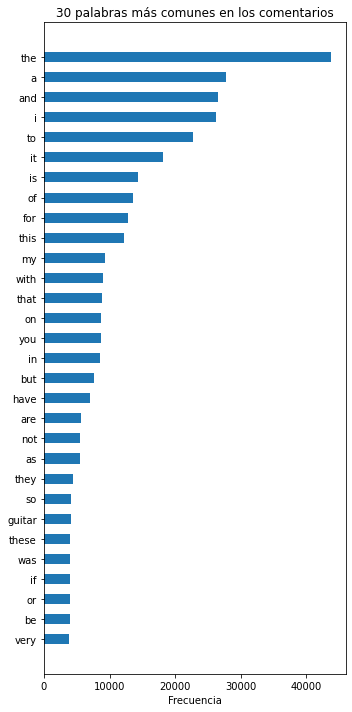

In [15]:
# Convierto la columna "Comentario" del dataframe en una lista de palabras y las junto en un solo string
text = ' '.join(df['Comentario'].tolist())

# Creo un objeto Counter que cuente el número de veces que aparece cada palabra en el string
words_nltk = text.lower().split()
wf = Counter(words_nltk)

# Selecciono las 30 palabras más comunes
wf_most_common = wf.most_common(30)

# Obtengo listas separadas con las palabras y las frecuencias
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]

# Ordeno por frecuencias
freqs, words = zip(*sorted(zip(freqs, words), reverse=True))

# Creo un gráfico de barras con la frecuencia de las palabras más comunes
fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(range(len(words)), freqs, align='center', height=0.5)
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)
ax.invert_yaxis()  # Coloco las palabras más comunes arriba
ax.set_xlabel('Frecuencia')
ax.set_title('30 palabras más comunes en los comentarios')
plt.tight_layout()
plt.show()


**Se ven muchas stopwords** que habrá que eliminar. De entre las que no son stop words la palabra guitar es una de las más comunes, aparece la número 24 del ranking de las más frecuentes.

Voy a fijarme en el numero de palabras y frases en los comentarios

In [16]:
# Creo una nueva columna "Palabras#" conteniendo el número de palabras en cada "Comentario" de esa columna
# Cargo el modelo de spacy
nlp = spacy.load("es_core_news_sm")
# Creo la columna "Palabras#"
df['Palabras#'] = 0
# Itero para recorrer cada comentario y contar palabras
for i, comment in enumerate(df['Comentario']):
    if isinstance(comment, float):  # verifico si el valor es de tipo float
      comment = str(comment)        # si lo es, lo convierto a cadena de texto
    doc = nlp(comment)
    words = [token.text for token in doc]
    largo = len(words)
    df.loc[i, 'Palabras#'] = largo

A continuación creo una columna llamada "Frases#" en el df que recoja el número de frases en cada "Comentario".

In [17]:
# Cargo el modelo de spacy
nlp = spacy.load("es_core_news_sm")
# Creo la columna "Frases#"
df['Frases#'] = 0
# Itero para recorrer cada comentario y contar frases
for i, comment in enumerate(df['Comentario']):
    if isinstance(comment, float):
        comment = str(comment)
    doc = nlp(comment)
    sents = list(doc.sents)   # Uso sentencizer para obtener una lista de frases
    num_sents = len(sents)
    df.loc[i, 'Frases#'] = num_sents

In [18]:
# Miro como mera comprobación
df.head(3).T

,0,1,2
IDRevisor,A2IBPI20UZIR0U,A14VAT5EAX3D9S,A195EZSQDW3E21
IDProducto,1384719342,1384719342,1384719342
Revisor,"cassandra tu ""Yeah, well, that's just like, u...",Jake,"Rick Bennette ""Rick Bennette"""
Utilidad,"[0, 0]","[13, 14]","[1, 1]"
Comentario,"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,","The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]","The primary job of this device is to block the breath that would otherwise produce a popping sound, while allowing your voice to pass through with no noticeable reduction of volume or high frequencies. The double cloth filter blocks the pops and lets the voice through with no coloration. The metal clamp mount attaches to the mike stand secure enough to keep it attached. The goose neck needs a little coaxing to stay where you put it."
Calificación,5.0,5.0,5.0
Resumen,good,Jake,It Does The Job Well
HoraUnix,1393545600,1363392000,1377648000
Fecha,"02 28, 2014","03 16, 2013","08 28, 2013"
Palabras#,57,117,82


In [19]:
#Voy a mirar las variables numéricas y especialemnte a estas nuevas variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calificación,10261.0,4.488744e+00,8.946424e-01,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
HoraUnix,10261.0,1.360606e+09,3.779735e+07,1.095466e+09,1.343434e+09,1.368490e+09,1.388966e+09,1.405987e+09
Palabras#,10261.0,1.035349e+02,1.280666e+02,0.000000e+00,3.500000e+01,6.100000e+01,1.190000e+02,2.329000e+03
Frases#,10261.0,5.868531e+00,5.991756e+00,0.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00,1.250000e+02


Lo que veo es que la variable "Calificación" toma valores entre 1 y 5. Su valor medio es de 4.48 lo que está mostrando que en general las calificaciones o valoraciones numéricas son altas.

Por otro lado la variable "Palabras#" recién creada tiene longitudes que van desde 0 palabras hasta 2329 palabras. Como la media es de 103 palabras, convendría observar si ese valor tan alto constituye un outlier.

La variable "Frases#" tiene longitudes que van desde 0 frases hasta 125 fraases. La media es de 5.86 frases, así que igual que antes convendría mirar si 125 frases es algún outlier.

Para verificar si son outliers muy a mirarlos de cerca:

In [20]:
# Ordeno en orden descendente por la columna "Palabras#" 
df_sorted = df.sort_values('Palabras#', ascending=False)

# Selecciono las primeras 5 filas
top_5 = df_sorted.head(5)

print(top_5)


           IDRevisor  IDProducto                      Revisor    Utilidad  \
6576  A20JJ8634DG3FS  B001I8ITQA  Johnny Guitar "J.F. Guitar"  [10, 10]     
9355  ACY9QYNDFLVBI   B005OZE9SA  G. Farnsworth                [129, 141]   
3613  A3H4S6YO9VNGDZ  B0006H92QK  Anthony J.                   [47, 50]     
4906  A2KI91IR3RA7D0  B000KIPUQG  David L. Vasser              [8, 9]       
412   A27L5L6I7OSV5B  B0002CZV82  Otto Correct                 [142, 150]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Pues efectivamente son comentarios largos, pero nada indica que puedan ser outliers de modo que no tomaré ninguna medida con esas entradas.

Me interesa saber si un mismo producto ha sido valorado varias veces y también si un mismo Revisor ha realizado varias valoraciones. Por eso miro a continuación los valores únicos de las variables "IDRevisor" e "IDProducto":

In [21]:
#Muestro los valores unicos de la columna "IDRevisor":
revisores_unicos = df["IDRevisor"].unique()
NumRU = len(revisores_unicos)
print(f'Existen {NumRU} revisores únicos')

Existen 1429 revisores únicos


Como hay 10261 entradas, que existan 1429 revisores significa en principio que hay revisores que han valorado más de un artículo. **ME PREGUNTO SI SERÍA INTERESANTE INVESTIGAR SI HAY SIMILITUDES O ALGUNA PAUTA COMÚN EN LOS TEXTOS DE LOS COMENTARIOS DE UN MISMO REVISOR**

De momento voy a ver quién es el revisor que más entradas tiene en el conjunto de datos.

In [22]:
conteo = df['IDRevisor'].value_counts()  # Numero de veces que aparece cada valor único en la columna "IDRevisor"
RevisorMasComun = conteo.index[0]        # Accedo al índice del valor más frecuente
frecuencia = conteo.iloc[0]              # Accedo a su frecuencia
print(f'El revisor más frecuente es {RevisorMasComun} que aparece {frecuencia} veces')

El revisor más frecuente es ADH0O8UVJOT10 que aparece 42 veces


Voy a ver cuáles son las 30 palabras más comunes en los comentarios que ha escrito este revisor más frecuente:

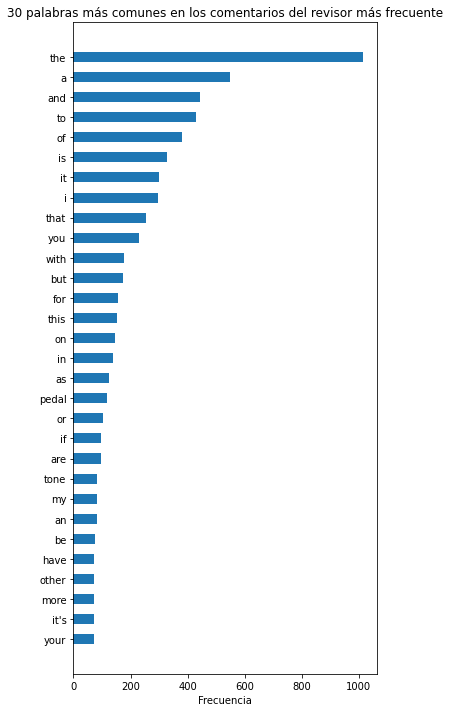

In [23]:
most_common_id = df['IDRevisor'].mode()[0]
text = ' '.join(df.loc[df['IDRevisor'] == most_common_id]['Comentario'].tolist())
words_nltk = text.lower().split()
wf = Counter(words_nltk)
wf_most_common = wf.most_common(30)
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]
freqs, words = zip(*sorted(zip(freqs, words), reverse=True))
fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(range(len(words)), freqs, align='center', height=0.5)
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)
ax.invert_yaxis()
ax.set_xlabel('Frecuencia')
ax.set_title('30 palabras más comunes en los comentarios del revisor más frecuente')
plt.tight_layout()
plt.show()


De nuevo veo muchas stop words. Sobre las que no lo son: las palabras "pedal" y "tono" están entre las más usadas por este revisor.

In [24]:
#Muestro los valores unicos de la columna "IDProducto":
productos_unicos = df["IDProducto"].unique()
NumPU = len(productos_unicos)
print(f'Existen {NumPU} productos únicos')

Existen 900 productos únicos


Como hay 10261 entradas, que existan 900 productos únicos significa en principio que hay productos que han sido valorados por más de un revisor. **ME PREGUNTO SI SERÍA INTERESANTE INVESTIGAR SI HAY SIMILITUDES O ALGUNA PAUTA COMÚN EN LOS DIFERENTES COMENTARIOS HECHOS SOBRE UN MISMO PRODUCTO**

De momento voy a ver cuál es el producto que más entradas tiene en el conjunto de datos.

In [25]:
# Similar a lo hecho antes:
conteo = df['IDProducto'].value_counts()  # Numero de veces que aparece cada valor único en la columna "IDRevisor"
ProductoMasComun = conteo.index[0]        # Accedo al índice del valor más frecuente
frecuencia = conteo.iloc[0]              # Accedo a su frecuencia
print(f'El producto más frecuente es {ProductoMasComun} que aparece {frecuencia} veces')

El producto más frecuente es B003VWJ2K8 que aparece 163 veces


Y voy a ver cuáles son las 30 palabras más comunes en los comentarios referidos a ese producto más frecuente:

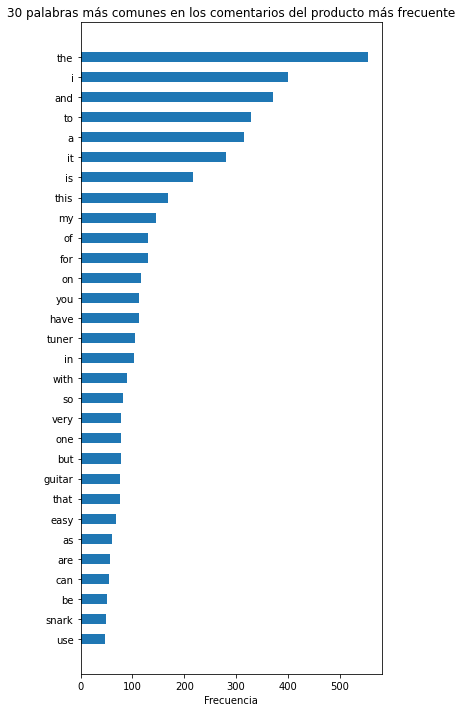

In [26]:
most_common_id = df['IDProducto'].mode()[0]
text = ' '.join(df.loc[df['IDProducto'] == most_common_id]['Comentario'].tolist())
words_nltk = text.lower().split()
wf = Counter(words_nltk)
wf_most_common = wf.most_common(30)
words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]
freqs, words = zip(*sorted(zip(freqs, words), reverse=True))
fig, ax = plt.subplots(figsize=(5, 10))
ax.barh(range(len(words)), freqs, align='center', height=0.5)
ax.set_yticks(range(len(words)))
ax.set_yticklabels(words)
ax.invert_yaxis()
ax.set_xlabel('Frecuencia')
ax.set_title('30 palabras más comunes en los comentarios del producto más frecuente')
plt.tight_layout()
plt.show()

De nuevo veo muchas stop words. En este caso, entre las palabras más frecuentes para ese producto también más frecuente tenemos: tuner, guitar, easy y snark (me refiero a las que claramente no son stopwords). Esas palabras tienen sentido a priori porque **tuner** y **snark** son instrumentos o herramientas que hacen más **'easy'** afinar determinados instrumentos de cuerda, como por ejemplo la **guitarra**.

A continuacion voy a mirar las reviews y el numero de positivas y negativas.

In [27]:
# Para obtener la distribución de "Calificación" por cada valor miro el rango de posibles valores de "Calificación":
# Aprovecho el código para mostrar reviews positivas y negativas (y neutras, ya que estamos)
min_calif = df['Calificación'].min()
max_calif = df['Calificación'].max()
num_valores_unicos = df['Calificación'].value_counts()

positivas = num_valores_unicos.loc[num_valores_unicos.index > 3].sum()
neutras = num_valores_unicos.loc[num_valores_unicos.index == 3].sum()
negativas = num_valores_unicos.loc[num_valores_unicos.index < 3].sum()

total = positivas + neutras + negativas
porcentaje_positivas = positivas / total * 100
porcentaje_neutras = neutras / total * 100
porcentaje_negativas = negativas / total * 100

print(f'Valor mínimo de Calificación: {min_calif}')
print(f'Valor máximo de Calificación: {max_calif}')
print(f'\nDistribución de Reviews por número de estrellas (Nº de valores únicos en "Calificación"):\n{num_valores_unicos}')
print(f'\nCalificaciones positivas (valores 4 ó 5): {positivas} ({porcentaje_positivas:.2f}%)')
print(f'Calificaciones neutras (valor 3): {neutras} ({porcentaje_neutras:.2f}%)')
print(f'Calificaciones negativas (valores 1 ó 2): {negativas} ({porcentaje_negativas:.2f}%)')

Valor mínimo de Calificación: 1.0
Valor máximo de Calificación: 5.0

Distribución de Reviews por número de estrellas (Nº de valores únicos en "Calificación"):
5.0    6938
4.0    2084
3.0    772 
2.0    250 
1.0    217 
Name: Calificación, dtype: int64

Calificaciones positivas (valores 4 ó 5): 9022 (87.93%)
Calificaciones neutras (valor 3): 772 (7.52%)
Calificaciones negativas (valores 1 ó 2): 467 (4.55%)


Vamos a verlo gráficamente:

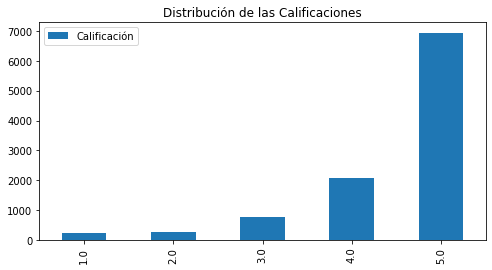

In [28]:
aux_df = pd.DataFrame(df['Calificación'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Distribución de las Calificaciones', figsize=(8, 4))

La gran mayoría de revisiones tienen una calificación positiva. El conjunto de datos está desbalanceado en ese sentido. Por eso en la etapa posterior de preprocesado será necesrio reducir la cantidad de instancias de las clases mayoritarias (4.0 y 5.0) para igualar la cantidad de instancias de cada clase y también aleatorizar el orden de aparición de cada valor de "Calificación".

**Voy a mirar los n-grams más frecuentes**

Para los bigramas

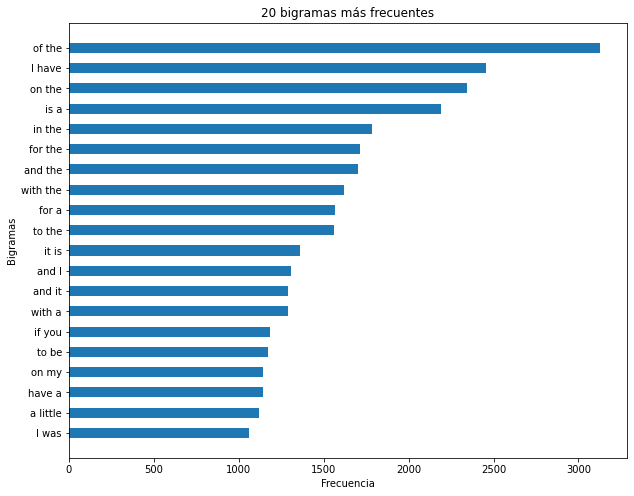

In [29]:
# Creo una lista de stop words
stop_words = get_stop_words (language = 'en')

# # Funcion para reprocesar los datos
# def preprocess(text):
#     # Texto a minúsculas
#     text = text.lower()
#     # Elimino signos de puntuación
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     # Elimino las stop words
#     text = ' '.join([word for word in text.split() if word not in stop_words])
#     return text

# # Preproceso la columna "Comentarios"
# df['Comentario'] = df['Comentario'].apply(preprocess)

# Obtengo lista de bigramas
bigrams_list = []
for text in df['Comentario']:
    bigrams = list(ngrams(text.split(), 2))   ####
    bigrams_list.extend(bigrams)

# Frecuencia de cada bigrama
freq_dist = FreqDist(bigrams_list)

# Selecciono los 20 bigramas más frecuentes
top_bigrams = sorted(freq_dist.most_common(20), key=lambda x: x[1], reverse=False)

# Mostrar los 20 bigramas más frecuentes en un gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh([' '.join(x[0]) for x in top_bigrams], [x[1] for x in top_bigrams], height=0.5)
plt.title('20 bigramas más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Bigramas')
plt.show()


De nuevo, el mismo comentario sobre stop words.

Para los trigramas

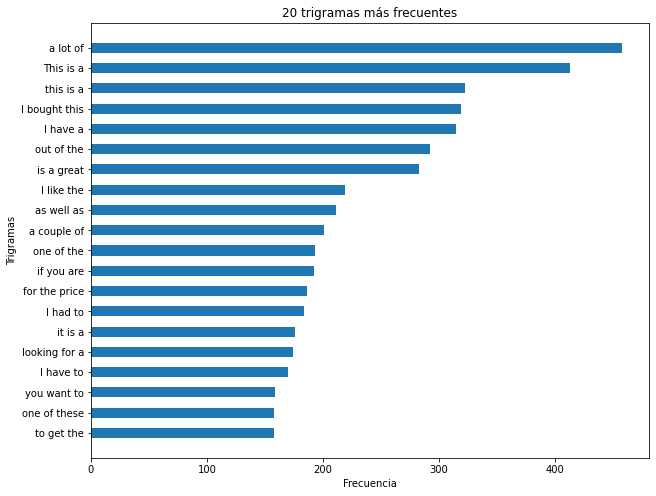

In [30]:
# Obtengo lista de trigramas
trigrams_list = []
for text in df['Comentario']:
    trigrams = list(ngrams(text.split(), 3))   ###
    trigrams_list.extend(trigrams)

# Frecuencia de cada trigrama
freq_dist = FreqDist(trigrams_list)

# Selecciono los 20 trigramas más frecuentes
top_trigrams = sorted(freq_dist.most_common(20), key=lambda x: x[1], reverse=False)

# Mostrar los 20 trigramas más frecuentes en un gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh([' '.join(x[0]) for x in top_trigrams], [x[1] for x in top_trigrams], height=0.5)
plt.title('20 trigramas más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Trigramas')
plt.show()

Lo mismo respecto a la necesidad de quitar las stop words

Ahora voy a obtener la nube de palabras:

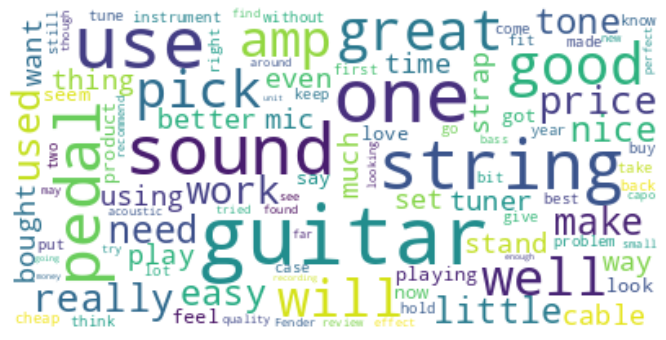

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(text, max_words):
    wordcloud = WordCloud(max_font_size=50, max_words=max_words, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Creo una lista con todos los comentarios
comentarios = df['Comentario'].tolist()

# Agrupo todos los comentarios
JoinComentarios = ' '.join(comentarios)

# Obtengo la lista de palabras
ListaPalabras = JoinComentarios.split()

# Uso la funcion plot_word_cloud definida antes para dibujar el mapa de palabras:
plot_word_cloud(ListaPalabras, 100)

Parece que guitar, sound, pedal y string son las palabras más frecuentes

Voy a mirar las NER Tags que encuentro:

In [32]:
# Cargo el modelo pre-entrenado de Spacy en inglés
nlp = spacy.load("en_core_web_sm")

# Función para procesar los comentarios
def process_comment(comment):
    # Aplicar el modelo NER de Spacy al comentario
    doc = nlp(comment)
    # Extraer las entidades y sus etiquetas
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Concateno las listas de entidades
entidades_totales = []
for comentario in df['Comentario']:
    entidades = process_comment(comentario)
    entidades_totales.extend(entidades)

# Convierto la lista en un DataFrame
entidades_df = pd.DataFrame(entidades_totales, columns=['Word', 'Type'])

# Imprimo palabras y TAG 
tags = list(set(entidades_df['Type'].values))
n_tags = len(tags)
print('NER Tags:', tags)
print('Número de etiquetas:', n_tags)
print(entidades_df)

# Número de palabras por tipo de etiqueta
word_count = entidades_df.groupby('Type').count()
word_count_sorted = word_count.sort_values(by='Word', ascending=False)
print('\nNúmero de palabras por tipo de etiqueta (ordenadas por frecuencia descendente):')
print(word_count_sorted['Word'])

NER Tags: ['DATE', 'TIME', 'ORG', 'QUANTITY', 'LOC', 'FAC', 'GPE', 'ORDINAL', 'PERSON', 'CARDINAL', 'WORK_OF_ART', 'NORP', 'PERCENT', 'MONEY', 'LANGUAGE', 'EVENT', 'PRODUCT', 'LAW']
Número de etiquetas: 18
                Word         Type
0      one            CARDINAL   
1      did!Buy        ORG        
2      mike           PERSON     
3      Love           WORK_OF_ART
4      Bass           PERSON     
...     ...              ...     
31949  814ce          PRODUCT    
31950  5              CARDINAL   
31951  4.5 stars      QUANTITY   
31952  34;jumbo&#34   MONEY      
31953  product!4.5/5  PRODUCT    

[31954 rows x 2 columns]

Número de palabras por tipo de etiqueta (ordenadas por frecuencia descendente):
Type
CARDINAL       7913
ORG            7359
PERSON         4484
DATE           3113
MONEY          1868
NORP           1446
GPE            1410
ORDINAL        1400
PRODUCT        793 
TIME           610 
QUANTITY       550 
WORK_OF_ART    273 
LOC            256 
FAC           

Las etiquetas son:

- NORP: Nacionalidades o grupos políticos, religiosos o étnicos.
- DATE: Referencias a fechas.
- ORDINAL: Palabras que indican orden o secuencia, como "primero", "segundo", "tercero".
- LANGUAGE: Referencias a idiomas.
- LAW: Referencias a leyes.
- MONEY: Referencias a cantidades de dinero.
- CARDINAL: Números cardinales (como "uno", "dos", "tres").
- PERSON: Referencias a personas.
- ORG: Referencias a organizaciones.
- TIME: Referencias a momentos del día o tiempos específicos.
- LOC: Referencias a ubicaciones geográficas.
- EVENT: Referencias a eventos, como reuniones o conferencias.
- WORK_OF_ART: Referencias a obras artísticas o literarias.
- PRODUCT: Referencias a productos o artículos.
- PERCENT: Referencias a porcentajes.
- FAC: Referencias a instalaciones o edificios.
- QUANTITY: Referencias a cantidades, como "1 litro" o "2 kilos".
- GPE: Entidades geopolíticas, como países, ciudades o estados.

<font color="red">**En el enunciado como penúltimo punto se pide hacer la visualización en 2 dimensiones de algunos word embeddings calculados con
Word2Vec, lo cual requiere hacer un preprocesado de los datos. Voy a aplazar para más adelante la visualizacion de word embeddings hasta que haya realizado el preprocesado de datos.**</font>

In [33]:
#Guardo el dataframe:
import locale
locale.getpreferredencoding(False)
import os
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG']='en_US.UTF-8'
from google.colab import drive
drive.mount('/content/gdrive')
df.to_csv('/content/gdrive/My Drive/NLP/df_ya_explorado.csv', index=False)
!ls '/content/gdrive/My Drive/NLP/'


Mounted at /content/gdrive


NotImplementedError: ignored

Para recuperarlo en próximos Notebooks:

import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/NLP/df_ya_explorado.csv')

<font color="darkblue">**Conclusiones de la exploración:**</font>

En mi opinión lo importante a tener en cuenta es:
- El conjunto de datos tiene 10261 entradas, y 32047 palabras en la variable "Comentario". Es probable que resulte pequeño para obtener buenos modelos. Por contra al ser un ejercicio con ánimo didáctico, y no de producción, esa cantidad puede favorecer tiempos de procesado asumibles.
- Si nos fijamos en los valores de "Calificación" hay asimetría en cuanto a que la gran parte de las observaciones tienen calificaciones muy altas. El 87.93% de las observaciones tienen calificaciones de 4 ó 5. Esto va a llevar a que cuando separemos los datos, los subconjuntos train y test estén elegidos de modo que en ambos tengamos esa misma proporcion de calificaciones con valores 4 ó 5. 
- Existen unos pocos valores NaN (menos del 0.3% del total) en la variable "Revisor". Como es una variable que no afecta al modelo decido mantenerlos en el df.
- Como era de esperar existen stop words en la variable "Comentario" que será necesario procesar en siguientes etapas del ejercicio.
- La NER Tag más frecuente es CARDINAL con 7913 apariciones, seguida de ORG con 7359. En el modelado habrá que ver si estas NER tan frecuentes son relevantes para la clasificación y de no serlo, probar a elimnarlas y verificar si el modelo mejora.

